In [14]:
import importlib
import os
from dotenv import load_dotenv
import polars as pl

from art.utils.benchmarking.load_trajectories import load_trajectories
from art.utils.benchmarking.charts import percentage_comparison_bar_chart, training_progress_chart
import art.utils.benchmarking.charts
from art.utils.benchmarking.types import BenchmarkModelKey
from art.utils.get_repo_root_path import get_repo_root_path
from art.utils.s3 import pull_model_from_s3

from summarizer.train import PROJECT_NAME, AGENT_NAME


importlib.reload(art.utils.benchmarking.charts)

load_dotenv()


PULL_MODELS = False
if PULL_MODELS:
    await pull_model_from_s3(
        model_name=AGENT_NAME,
        project=PROJECT_NAME,
    )
    await pull_model_from_s3(
        model_name="gpt-4o",
        project=PROJECT_NAME,
    )
    await pull_model_from_s3(
        model_name="gpt-4.1",
        project=PROJECT_NAME,
    )
    await pull_model_from_s3(
        model_name="gpt-4o-mini",
        project=PROJECT_NAME,
    )
    await pull_model_from_s3(
        model_name="o4-mini",
        project=PROJECT_NAME,
    )
    await pull_model_from_s3(
        model_name="gemini-2.5-pro",
        project=PROJECT_NAME,
    )
# await load_trajectories.bust_cache()
df = await load_trajectories(
    project_name=PROJECT_NAME,
    models=[AGENT_NAME, "gpt-4o", "gpt-4.1", "gpt-4o-mini", "o4-mini", "gemini-2.5-pro"],
)
df = df.filter(pl.col("step") < 10)

benchmarks_dir = f"{get_repo_root_path()}/assets/benchmarks/{PROJECT_NAME}"

os.makedirs(benchmarks_dir, exist_ok=True)

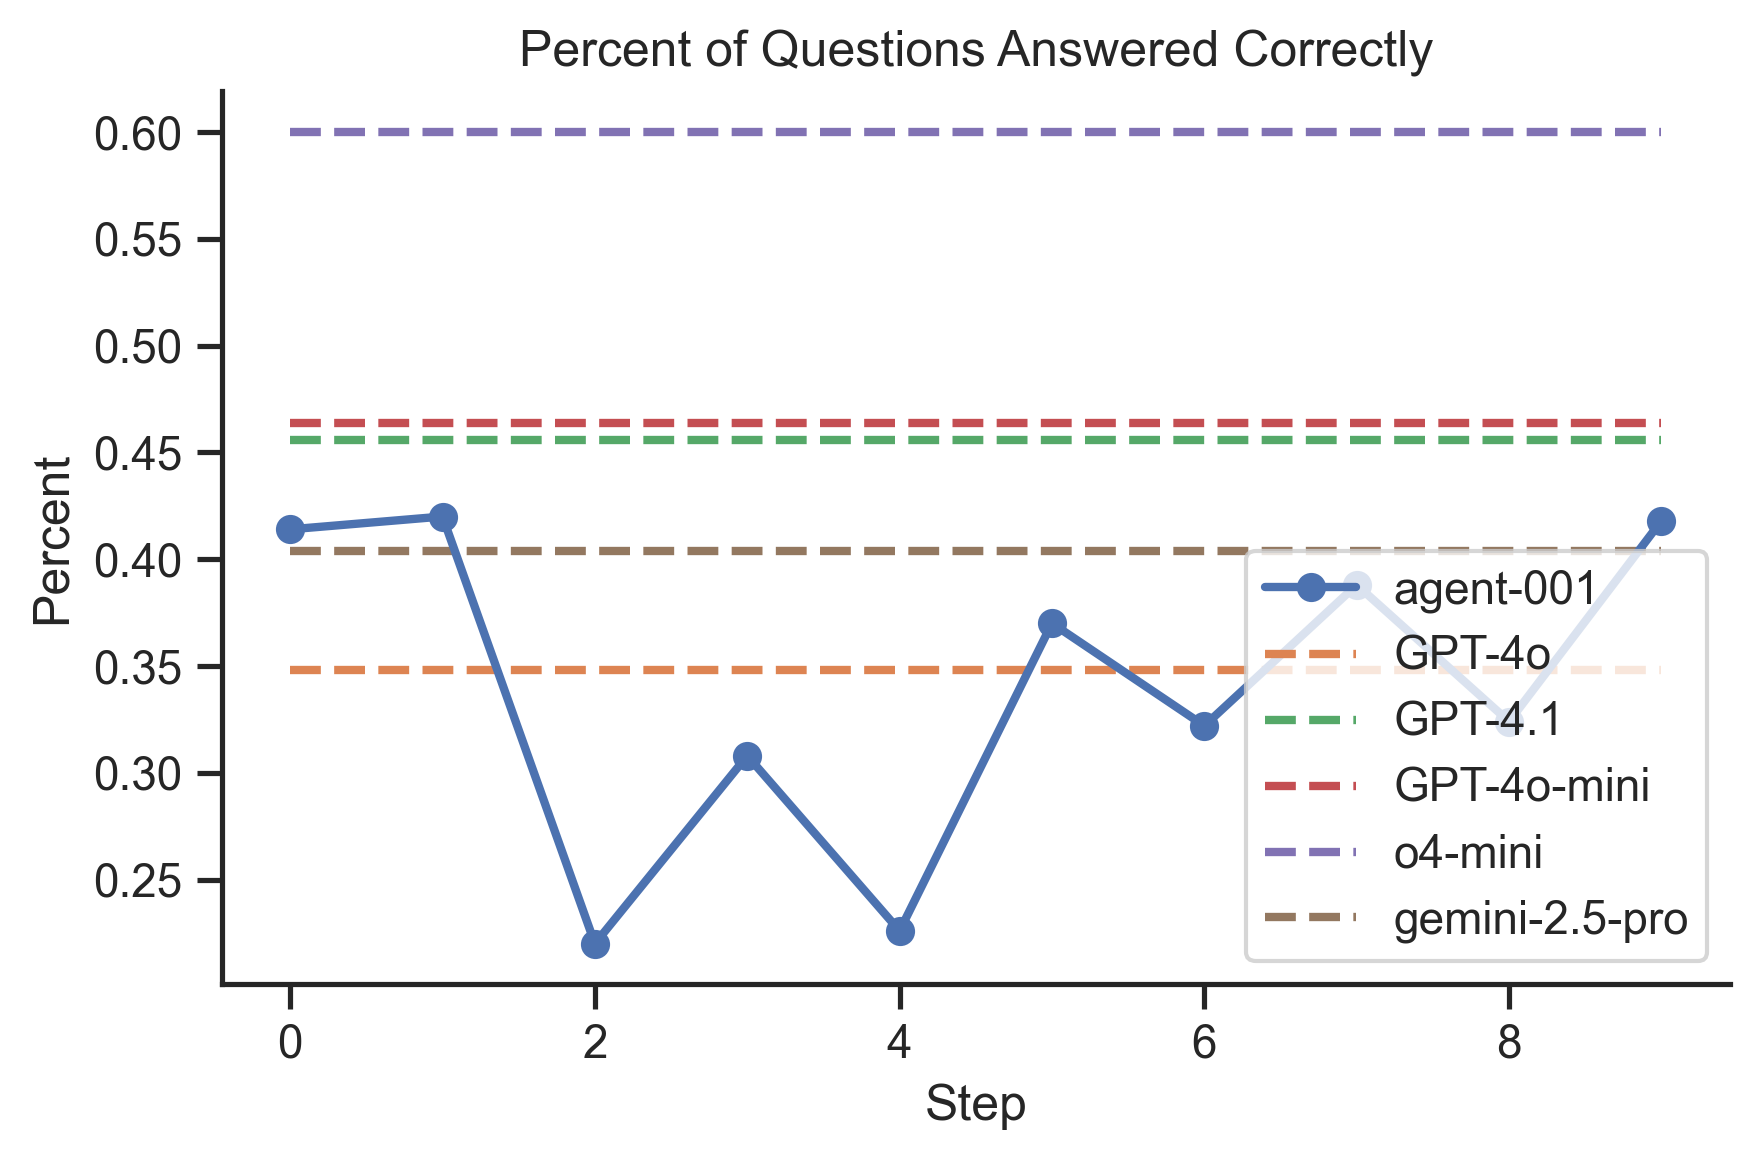

In [15]:
line_graph = training_progress_chart(
    df,
    "percent",
    models=[
        BenchmarkModelKey(AGENT_NAME, AGENT_NAME, "train"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        BenchmarkModelKey("o4-mini", "o4-mini"),
        BenchmarkModelKey("gemini-2.5-pro", "gemini-2.5-pro"),
    ],
    title="Percent of Questions Answered Correctly",
    y_label="Percent",
)
line_graph.savefig(
    f"{benchmarks_dir}/accuracy-training-progress.svg"
)

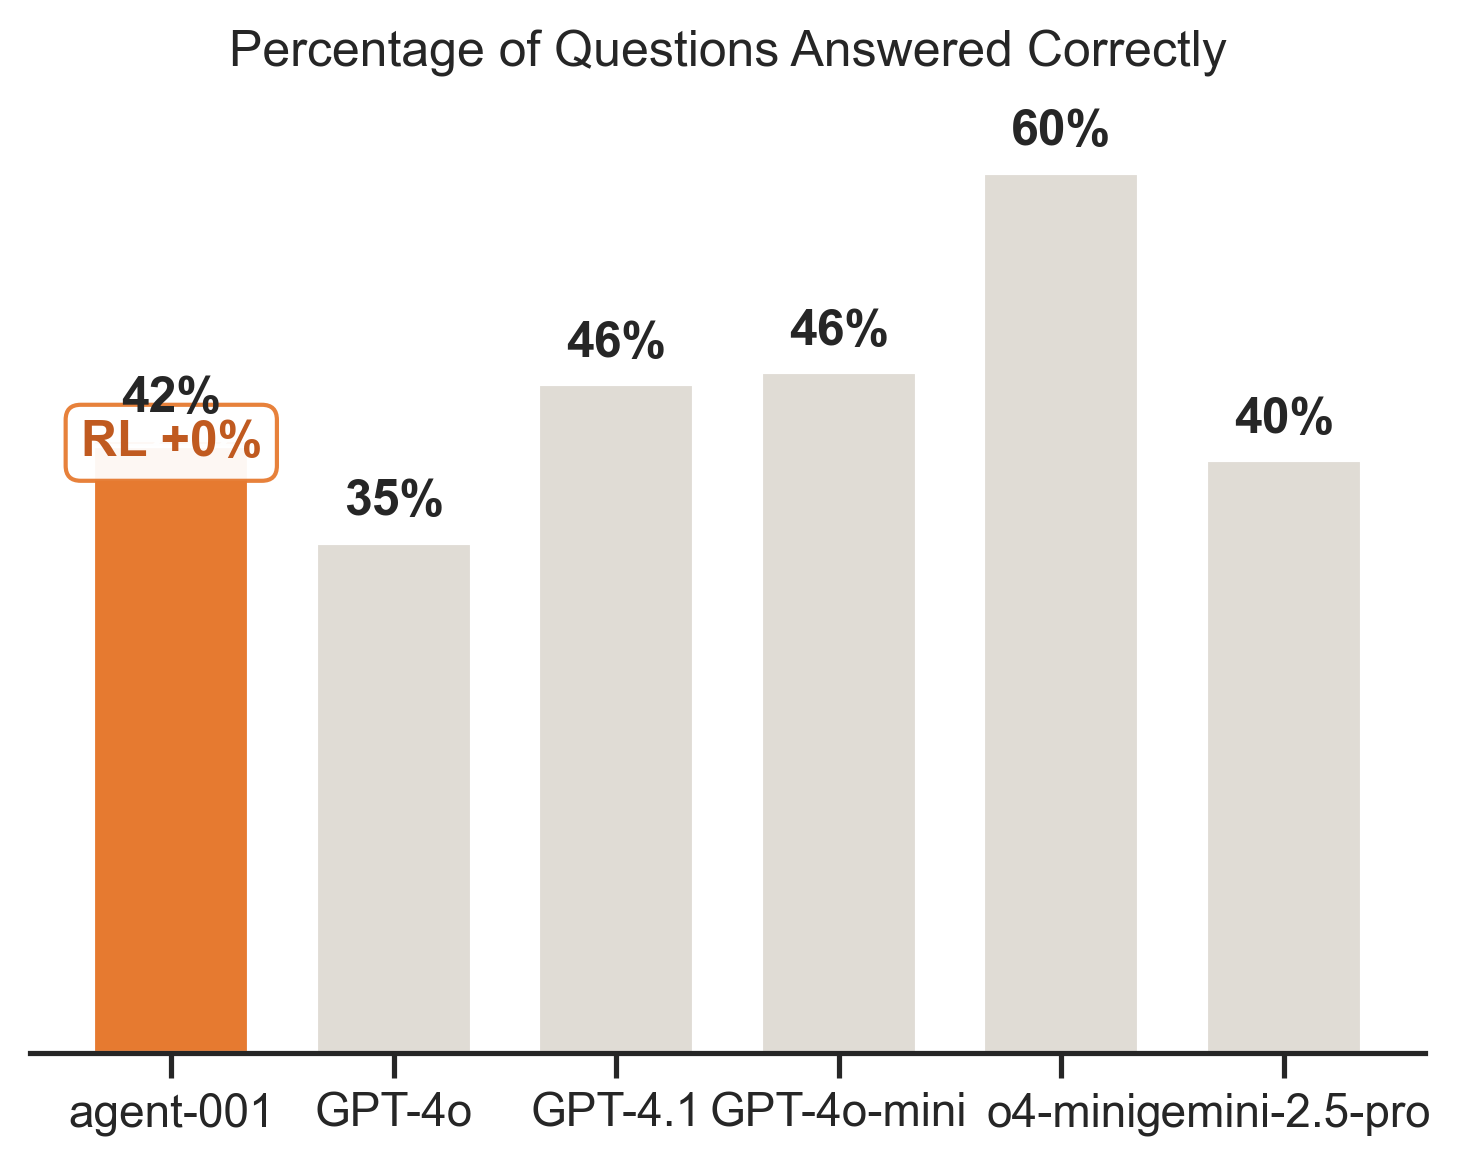

In [16]:
bar_chart = percentage_comparison_bar_chart(
    df,
    metric_name="percent",
    models=[
        BenchmarkModelKey(AGENT_NAME, AGENT_NAME, "train"),
        BenchmarkModelKey("gpt-4o", "GPT-4o"),
        BenchmarkModelKey("gpt-4.1", "GPT-4.1"),
        BenchmarkModelKey("gpt-4o-mini", "GPT-4o-mini"),
        BenchmarkModelKey("o4-mini", "o4-mini"),
        BenchmarkModelKey("gemini-2.5-pro", "gemini-2.5-pro"),
    ],
    title="Percentage of Questions Answered Correctly",
)
bar_chart.savefig(
    f"{benchmarks_dir}/accuracy-comparison.svg"
)